In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


from helpers import *
from gaussfit import *
from fit_double_exp import fitDualExp, dualexpo

# ...
old_hv_dict = {}
load_hv( "../../gain/hvdb/Sy4527channels_24112021_nominal.sub", old_hv_dict )

# Define source parameters 
sdir   = "../calibrationdb/"
vfile  = "../../gain/hvdb/Sy4527channels_22122021_calibrated.sub"
trange = (1640226402, 1641595824)
adders = 0

# Import data between November and December 2021
data   = dataLoader( sdir, vfile, trange, adders )

channels=[ 2, 29, 124, 131, 169, 195, 240, 358 ]
data = data[~data.pmt.isin(channels)]

Import data in folder../calibrationdb/ for interval (1640226402:1641595824)
Import voltage info from ../../gain/hvdb/Sy4527channels_22122021_calibrated.sub


                        q    dv  voltage        dq
pmt                                               
30   [0.487503, 0.498062] -24.0   1631.0  0.010559
99   [0.499411, 0.472048]   5.0   1996.0 -0.027363
120  [0.465407, 0.498204] -23.0   1701.0  0.032797
162  [0.487153, 0.500633] -17.0   1492.0  0.013480
166  [0.493583, 0.511875] -14.0   1695.0  0.018292
264  [0.514514, 0.489236] -16.0   1599.0 -0.025278
334  [0.495276, 0.465148] -21.0   1576.0 -0.030128


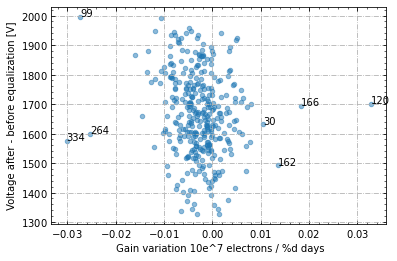

In [2]:
data["old_voltage"] = data.pmt.apply( lambda x : old_hv_dict.get(x) )
data["dv"] = data["voltage"]-data["old_voltage"]

df=data.groupby("pmt").agg({'q':list, 'dv':'mean', 'voltage':'mean'})
df["dq"]=df["q"].apply( lambda x : x[1]-x[0] )

plt.scatter(df["dq"], df["voltage"], s=20, alpha=0.5)

plt.xlabel(" Gain variation 10e^7 electrons / %d days".format( (trange[1]-trange[0])/(3600*24) ) )
plt.ylabel(" Voltage after - before equalization [V] ".format( (trange[1]-trange[0])/(3600*24) ) )


_sel1= (df.dq > 0.01) | (df.dq < -0.02)

print(df[_sel1])

for i in df[_sel1].index.values: 
    
    dq = df.loc[i].dq
    dv = df.loc[i].voltage
    
    plt.text( x=dq, y=dv, s=i )

    

#plt.savefig("gain_variations_voltage.pdf")       
plt.show()
